In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

import math
import numpy as np
import scipy.constants as const

from pykern.pkcollections import PKDict

import rslaser.rspulse.pulse as rsp
import rslaser.rspulse.gauss_hermite as rsgh
import rslaser.utils.plot_fields as rspf
import rslaser.utils.constants as rsc

In [2]:
# specify all top-level input parameters

# central values
a0 = 0.01            # 0.85e-9 * lambda [microns] * Sqrt(Intensity [W/cm^2])
lambda0 = 8.e-7      # wavelength [m]
tau_fwhm = 0.3e-13   # FWHM pulse length [s]
w0 = 400.e-6         # waist size [m]
k0 = rsc.TWO_PI/lambda0    # central wavenumber [radians/m]
zR = 0.5*k0*w0*2           # Rayleigh range [m]
# z_waist = -15.*zR    # longitudinal waist position [m]
z_waist =  0.0       # longitudinal waist position [m]
z_center = 0.0       # longitudinal position of pulse center [m]

# deviations
d_lambda = 0.        # full wavelength chirp across laser pulse [m]
dw0x = 0.0           # deviation of horizontal waist from w0
dw0y = 0.0           # deviation of vertical waist from w0
dzwx = 0.0           # deviation of horizontal waist position from z_waist
dzwy = 0.0           # deviation of vertical waist position from z_waist
x_shift = 0.         # bulk horizontal shift of pulse position
y_shift = 0.         # bulk vertical shift of pulse position

# numerical values
num_slices = 3       # desired number of slices (i.e. SRW wavefronts) to represent the pulse
n_points = 101       # number of bins along each axis for contour plots

In [3]:
# create a dictionary of all relevant physical and numerical quantities
data_in=PKDict()

data_in.a0 = a0
data_in.lambda0 = lambda0
data_in.tau_fwhm = tau_fwhm
data_in.w0 = w0
data_in.z_waist = z_waist
data_in.z_center = z_center

data_in.d_lambda = d_lambda
data_in.dw0x = dw0x
data_in.dw0y = dw0y
data_in.dzwx = dzwx
data_in.dzwy = dzwy
data_in.x_shift = x_shift
data_in.y_shift = y_shift

data_in.nslice = num_slices

#create laser pulse
LP = rsp.LaserPulse(data_in)

nx, ny, n_cells =  512 512 262144


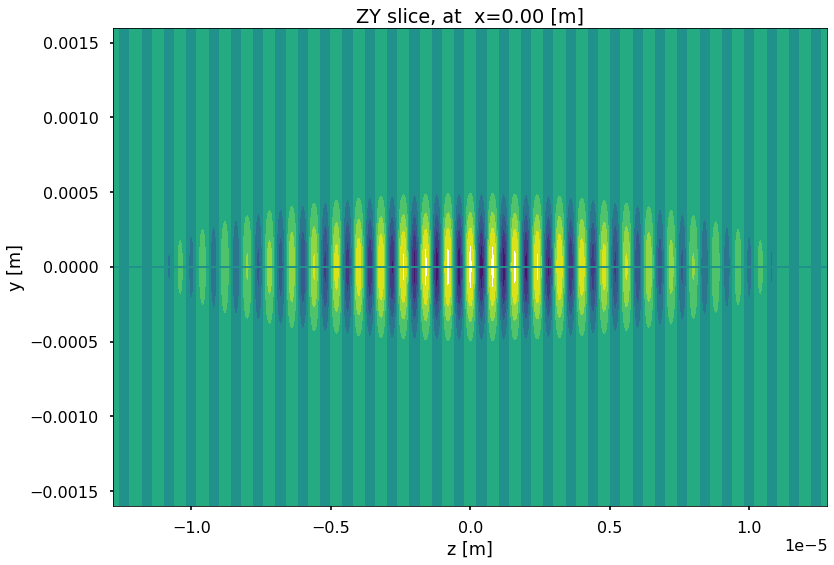

In [4]:
# plot fields in a z-y plane that intersects the x=0 axis
# we are assuming linear polarization along the x-axis
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    rspf.plot_zy(LP.envelope, ax)

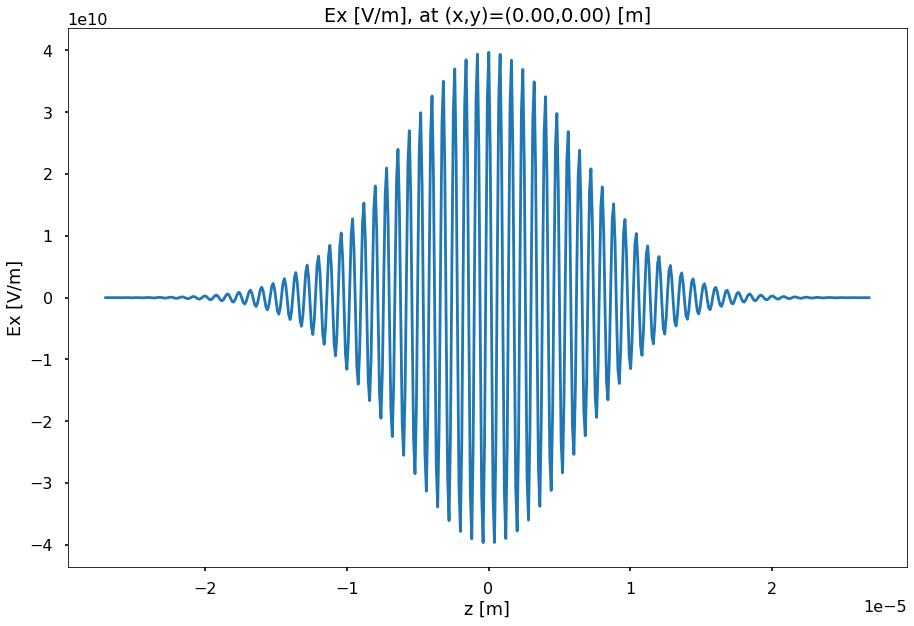

In [5]:
# plot a lineout of Ex along z
# we are assuming linear polarization along the x-axis
z_max = 3. * LP.envelope.tau_fwhm * const.c
z_min = -z_max

# resolution
z_res = 8
del_z = lambda0 / z_res
num_pts = int((z_max - z_min) / del_z)
z_vals = np.zeros(num_pts)

for ind in range(num_pts):
    z_vals[ind] = z_min + ind*del_z
    
x_val = 0.
y_val = 0.

with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    rspf.plot_z(z_vals, LP.envelope, ax, x_val, y_val)

plt.tight_layout()